### Intro to Scientific Python Ecosystem

In [1]:
import numpy as np

In [2]:
!head dummy.csv

0,0,1,3,1,2,4
0,1,2,1,2,1,3
0,1,1,3,3,2,6

Read dummy dataset with numpy

In [3]:
np.loadtxt?

Signature:
np.loadtxt(
    fname,
    dtype=<class 'float'>,
    comments='#',
    delimiter=None,
    converters=None,
    skiprows=0,
    usecols=None,
    unpack=False,
    ndmin=0,
    encoding='bytes',
    max_rows=None,
    *,
    like=None,
)
Docstring:
Load data from a text file.

Each row in the text file must have the same number of values.

Parameters
----------
fname : file, str, or pathlib.Path
    File, filename, or generator to read.  If the filename extension is
    ``.gz`` or ``.bz2``, the file is first decompressed. Note that
    generators should return byte strings.
dtype : data-type, optional
    Data-type of the resulting array; default: float.  If this is a
    structured data-type, the resulting array will be 1-dimensional, and
    each row will be interpreted as an element of the array.  In this
    case, the number of columns used must match the number of fields in
    the data-type.
comments : str or sequence of str, optional
    The characters or list of cha

In [4]:
import os
from pathlib import Path


BASE_FOLDER = Path(os.path.abspath(os.path.curdir))
DATA_FOLDER = BASE_FOLDER / "data"

In [5]:
dummy_data = np.loadtxt("dummy.csv", delimiter=",")

Playing with Attribute of `ndarray`

In [6]:
type(dummy_data)

numpy.ndarray

In [7]:
dummy_data.shape

(3, 7)

In [8]:
dummy_data.dtype

dtype('float64')

In [9]:
dummy_data

array([[0., 0., 1., 3., 1., 2., 4.],
       [0., 1., 2., 1., 2., 1., 3.],
       [0., 1., 1., 3., 3., 2., 6.]])

In [10]:
dummy_data = np.loadtxt("dummy.csv", delimiter=",", dtype=np.int32)

In [11]:
dummy_data.dtype

dtype('int32')

In [12]:
dummy_data

array([[0, 0, 1, 3, 1, 2, 4],
       [0, 1, 2, 1, 2, 1, 3],
       [0, 1, 1, 3, 3, 2, 6]], dtype=int32)

### Let's switch to some real data

$\rightarrow$ _Adapted from_ : [**Software Carpentries: Programming with Python**]()

## Arthritis Inflammation
We are studying **inflammation in patients** who have been given a new treatment for arthritis.

There are `60` patients, who had their inflammation levels recorded for `40` days.
We want to analyze these recordings to study the effect of the new arthritis treatment.

To see how the treatment is affecting the patients in general, we would like to:

1. Process the file to extract data for each patient;
2. Calculate some statistics on each patient;
    - e.g. average inflammation over the `40` days (or `min`, `max` .. and so on)
    - e.g average statistics per week (we will assume `40` days account for `5` weeks)
    - `...` (open to ideas)
3. Calculate some statistics on the dataset.
    - e.g. min and max inflammation registered overall in the clinical study;
    - e.g. the average inflammation per day across all patients.
    - `...` (open to ideas)


![3-step flowchart shows inflammation data records for patients moving to the Analysis step
where a heat map of provided data is generated moving to the Conclusion step that asks the
question, How does the medication affect patients?](
https://raw.githubusercontent.com/swcarpentry/python-novice-inflammation/gh-pages/fig/lesson-overview.svg "Lesson Overview")


### Data Format

The data sets are stored in
[comma-separated values] (CSV) format:

- each row holds information for a single patient,
- columns represent successive days.

The first three rows of our first file look like this:
~~~
0,0,1,3,1,2,4,7,8,3,3,3,10,5,7,4,7,7,12,18,6,13,11,11,7,7,4,6,8,8,4,4,5,7,3,4,2,3,0,0
0,1,2,1,2,1,3,2,2,6,10,11,5,9,4,4,7,16,8,6,18,4,12,5,12,7,11,5,11,3,3,5,4,4,5,5,1,1,0,1
0,1,1,3,3,2,6,2,5,9,5,7,4,5,4,15,5,11,9,10,19,14,12,17,7,12,11,7,4,2,10,5,4,2,2,3,2,2,1,1
~~~

Each number represents the number of inflammation bouts that a particular patient experienced on a
given day.

For example, value "6" at row 3 column 7 of the data set above means that the third
patient was experiencing inflammation six times on the seventh day of the clinical study.

Our **task** is to gather as much information as possible from the dataset, and to report back to colleagues to foster future discussions.

In [13]:
if_data_01 = DATA_FOLDER / "inflammation-01.csv"

In [14]:
inf_data = np.loadtxt(if_data_01, delimiter=",", dtype=np.int32)

In [15]:
inf_data.shape

(60, 40)

In [16]:
inf_data.dtype

dtype('int32')

In [17]:
inf_data.size

2400

In [18]:
inf_data.itemsize

4

#### Slicing

In [19]:
inf_data[:3]

array([[ 0,  0,  1,  3,  1,  2,  4,  7,  8,  3,  3,  3, 10,  5,  7,  4,
         7,  7, 12, 18,  6, 13, 11, 11,  7,  7,  4,  6,  8,  8,  4,  4,
         5,  7,  3,  4,  2,  3,  0,  0],
       [ 0,  1,  2,  1,  2,  1,  3,  2,  2,  6, 10, 11,  5,  9,  4,  4,
         7, 16,  8,  6, 18,  4, 12,  5, 12,  7, 11,  5, 11,  3,  3,  5,
         4,  4,  5,  5,  1,  1,  0,  1],
       [ 0,  1,  1,  3,  3,  2,  6,  2,  5,  9,  5,  7,  4,  5,  4, 15,
         5, 11,  9, 10, 19, 14, 12, 17,  7, 12, 11,  7,  4,  2, 10,  5,
         4,  2,  2,  3,  2,  2,  1,  1]], dtype=int32)

In [20]:
inf_data[:3, :7]

array([[0, 0, 1, 3, 1, 2, 4],
       [0, 1, 2, 1, 2, 1, 3],
       [0, 1, 1, 3, 3, 2, 6]], dtype=int32)

### Performance Comparison Numpy vs Lists

In [21]:
%%timeit
matrix_lol = []
for i in range(10000):
    row = list()
    for j in range(1000):
        row.append(j)
    matrix_lol.append(row)


1.03 s ± 36.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
%%timeit
matrix_np = np.empty((10000, 1000), dtype=np.int32)
for i in range(10000):
    for j in range(1000):
        matrix_np[i, j] = j

1.98 s ± 134 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
%%timeit
matrix_np_faster = np.arange(10000*1000).reshape(10000, 1000)

19.3 ms ± 699 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Let's talk about patients

1. average inflammations per day (max and min)
2. median
3. standard deviation

#### Compute patient's averages with vanilla python

In [24]:
patients = list()
with open(if_data_01) as data_file:
    for line in data_file:
        line = line.strip()
        if not line:
            continue
        values = line.split(",")
        patient_data = list()
        for value in values:
            patient_data.append(int(value))
        patients.append(tuple(patient_data))
    

In [25]:
len(patients)

60

In [26]:
from typing import List, Tuple

def overall_average(patients: List[Tuple[int]]) -> float:
    n_values = 0
    sum_values = 0
    for patient in patients:
        n_values += len(patient)
        sum_values += sum(patient)
    return sum_values / n_values

In [27]:
%timeit overall_average(patients)

32.8 µs ± 798 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


#### Average of the whole dataset with `np.mean`

In [28]:
%timeit inf_data.mean()

12.2 µs ± 350 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [29]:
overall_average(patients)

6.14875

In [30]:
inf_data.mean()

6.14875

#### Average for each patient

In [31]:
average_per_patient = inf_data.mean(axis=1)

In [32]:
average_per_patient.shape

(60,)

In [33]:
average_per_patient

array([5.45 , 5.425, 6.1  , 5.9  , 5.55 , 6.225, 5.975, 6.65 , 6.625,
       6.525, 6.775, 5.8  , 6.225, 5.75 , 5.225, 6.3  , 6.55 , 5.7  ,
       5.85 , 6.55 , 5.775, 5.825, 6.175, 6.1  , 5.8  , 6.425, 6.05 ,
       6.025, 6.175, 6.55 , 6.175, 6.35 , 6.725, 6.125, 7.075, 5.725,
       5.925, 6.15 , 6.075, 5.75 , 5.975, 5.725, 6.3  , 5.9  , 6.75 ,
       5.925, 7.225, 6.15 , 5.95 , 6.275, 5.7  , 6.1  , 6.825, 5.975,
       6.725, 5.7  , 6.25 , 6.4  , 7.05 , 5.9  ])

**Start Lect 4**:

Let's compare time execution to Vanilla Python Implementation

In [51]:
%%timeit
def average_per_patient(patients: List[Tuple[int]]) -> List[float]:
    avg_patients = list()
    for patient_data in patients:
        # patient_data is a tuple
        avg_inflammation = sum(patient_data) / len(patient_data)
        avg_patients.append(avg_inflammation)
    return avg_patients

avg_inflammation_list = average_per_patient(patients)

35.2 µs ± 1.06 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [50]:
len(avg_inflammation_list)

60

In [52]:
%timeit inf_data.mean(axis=1)

17 µs ± 1.88 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


#### Exercise:

Calculate Daily Inflammation Average

In [ ]:
# Vanilla Python Implementation

In [97]:
%%timeit
def daily_average_inflammation(patients: List[Tuple[int]]) -> List[float]:
    daily_inflammation = list()
    days = len(patients[0])  # get the total nr. of days from first patient data
    for day in range(days):  # iterate for all days
        day_average = 0  # average for current day
        for patient_data in patients:  # iterate over all the patient data
            day_average += patient_data[day]  # getting data for the current day (at day index)
        day_average /= len(patients)  # average
        daily_inflammation.append(day_average)  # appending to the daily    
    return daily_inflammation

avg_per_days = daily_average_inflammation(patients)


183 µs ± 4.15 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [62]:
len(avg_per_days)

40

In [63]:
avg_per_days[:10]

[0.0,
 0.45,
 1.1166666666666667,
 1.75,
 2.433333333333333,
 3.15,
 3.8,
 3.8833333333333333,
 5.233333333333333,
 5.516666666666667]

In [67]:
%%timeit 
def daily_average_inflammmation_take2(patients: List[Tuple[int]]) -> List[float]:
    daily_inflammation = list()
    days = len(patients[0])
    for day in range(days):
        daily_inflammation.append([])
        
    for patient_data in patients:
        for day, inflammation_value in enumerate(patient_data):
            daily_inflammation[day].append(inflammation_value)
            
    # List of List of int 
    """
    daily_inflammation = [
       [ p1, p2, ....]  # day1
       [ p1, p2, ...]   # day2
    ]
    """
    
    average_inflammation = list()
    for daily_info in daily_inflammation:
        average_inflammation.append(sum(daily_info) / len(daily_info))
    return average_inflammation
avg_per_days_take2 = daily_average_inflammmation_take2(patients)

293 µs ± 23.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [59]:
len(avg_per_days_take2)

40

In [60]:
avg_per_days_take2[:10]

[0.0,
 0.45,
 1.1166666666666667,
 1.75,
 2.433333333333333,
 3.15,
 3.8,
 3.8833333333333333,
 5.233333333333333,
 5.516666666666667]

In [68]:
#Numpy
%timeit inf_data.T.mean(axis=1)

17.6 µs ± 600 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [69]:
%timeit inf_data.mean(axis=0)

15.4 µs ± 2.11 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [70]:
inf_data.mean(axis=2)

AxisError: axis 2 is out of bounds for array of dimension 2

In [72]:
inf_data_3d = inf_data.reshape(inf_data.shape[0], inf_data.shape[1], 1)
inf_data_3d.shape

(60, 40, 1)

In [73]:
inf_data_3d = inf_data[..., np.newaxis]
inf_data_3d.shape

(60, 40, 1)

In [77]:
inf_data_3d.mean(axis=2) == inf_data

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [71]:
inf_data_3d = inf_data[:, :, np.newaxis, np.newaxis, np.newaxis]
inf_data_3d.shape

(60, 40, 1)

Side note on NumPy Slicing and Indexing

In [78]:
l = list(range(20))
l[::2]

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

In [79]:
inf_data[::2, ::2].shape

(30, 20)

In [80]:
patient_index = np.asarray([0, 3, 2, 1, 6])
day_index = np.asarray([0, 1, 7])

In [82]:
inf_data[patient_index]

array([[ 0,  0,  1,  3,  1,  2,  4,  7,  8,  3,  3,  3, 10,  5,  7,  4,
         7,  7, 12, 18,  6, 13, 11, 11,  7,  7,  4,  6,  8,  8,  4,  4,
         5,  7,  3,  4,  2,  3,  0,  0],
       [ 0,  0,  2,  0,  4,  2,  2,  1,  6,  7, 10,  7,  9, 13,  8,  8,
        15, 10, 10,  7, 17,  4,  4,  7,  6, 15,  6,  4,  9, 11,  3,  5,
         6,  3,  3,  4,  2,  3,  2,  1],
       [ 0,  1,  1,  3,  3,  2,  6,  2,  5,  9,  5,  7,  4,  5,  4, 15,
         5, 11,  9, 10, 19, 14, 12, 17,  7, 12, 11,  7,  4,  2, 10,  5,
         4,  2,  2,  3,  2,  2,  1,  1],
       [ 0,  1,  2,  1,  2,  1,  3,  2,  2,  6, 10, 11,  5,  9,  4,  4,
         7, 16,  8,  6, 18,  4, 12,  5, 12,  7, 11,  5, 11,  3,  3,  5,
         4,  4,  5,  5,  1,  1,  0,  1],
       [ 0,  0,  2,  2,  4,  2,  2,  5,  5,  8,  6,  5, 11,  9,  4, 13,
         5, 12, 10,  6,  9, 17, 15,  8,  9,  3, 13,  7,  8,  2,  8,  8,
         4,  2,  3,  5,  4,  1,  1,  1]], dtype=int32)

In [83]:
inf_data[3]

array([ 0,  0,  2,  0,  4,  2,  2,  1,  6,  7, 10,  7,  9, 13,  8,  8, 15,
       10, 10,  7, 17,  4,  4,  7,  6, 15,  6,  4,  9, 11,  3,  5,  6,  3,
        3,  4,  2,  3,  2,  1], dtype=int32)

In [84]:
mask = (inf_data > 6)

In [85]:
type(mask)

numpy.ndarray

In [86]:
mask.dtype

dtype('bool')

In [87]:
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [88]:
mask.shape

(60, 40)

In [89]:
inf_data[mask]

array([ 7,  8, 10,  7,  7,  7, 12, 18, 13, 11, 11,  7,  7,  8,  8,  7, 10,
       11,  9,  7, 16,  8, 18, 12, 12,  7, 11, 11,  9,  7, 15, 11,  9, 10,
       19, 14, 12, 17,  7, 12, 11,  7, 10,  7, 10,  7,  9, 13,  8,  8, 15,
       10, 10,  7, 17,  7, 15,  9, 11,  7, 10,  8, 10, 17,  9, 14,  9,  7,
       13,  9, 12,  7,  7,  9,  7,  9,  9, 15, 16, 18, 12, 12, 18,  9, 10,
       12,  7,  8,  7,  8, 11,  9, 13, 12, 10,  9, 17, 15,  8,  9, 13,  7,
        8,  8,  8,  7,  8,  8, 10,  9, 15, 11, 18, 19, 20,  8, 13, 15, 10,
       10,  7,  9,  8, 11, 12, 10, 11,  9, 10, 17, 11, 16, 12,  8, 14, 13,
       10, 11,  7,  8,  8, 12, 13, 13,  8, 16,  8, 18, 15, 16, 14, 12,  7,
        8,  9, 11,  8,  7, 10, 13,  7, 13, 15, 18,  8, 15, 15, 16, 11, 14,
       12, 10, 10,  7,  8,  8, 11,  8, 14, 11, 11,  9, 16, 18, 12,  7,  8,
        7,  9,  9, 11, 12, 17, 13, 15, 13, 12,  8,  7,  7, 12,  9,  7, 13,
       10, 13,  9, 16, 15,  9, 11, 11, 11, 12,  8,  7, 10,  7, 13,  7, 17,
        9, 12, 13, 10, 12

In [92]:
inf_data[~(inf_data > 6)].shape

(1458,)

In [93]:
inf_data_copy = np.copy(inf_data)

In [94]:
inf_data_copy[(inf_data_copy <= 6)] = 0

In [95]:
inf_data_copy[:2]

array([[ 0,  0,  0,  0,  0,  0,  0,  7,  8,  0,  0,  0, 10,  0,  7,  0,
         7,  7, 12, 18,  0, 13, 11, 11,  7,  7,  0,  0,  8,  8,  0,  0,
         0,  7,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10, 11,  0,  9,  0,  0,
         7, 16,  8,  0, 18,  0, 12,  0, 12,  7, 11,  0, 11,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0]], dtype=int32)

### Plotting with `matplotlib`

We will be using `matplotlib` to add in some visualisation of the Data

In [98]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Avg inflammations')

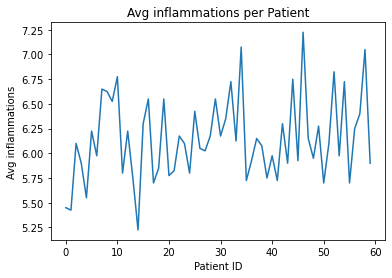

In [100]:
# plot a line with the computed means
plt.plot(inf_data.mean(axis=1))

# set the tile
plt.title("Avg inflammations per Patient")

# set the label for the x-axis
plt.xlabel("Patient ID")

# set the label for the y-axis
plt.ylabel("Avg inflammations")

#### Plot with scatter points instead of a continuous line

Text(0, 0.5, 'Avg inflammations')

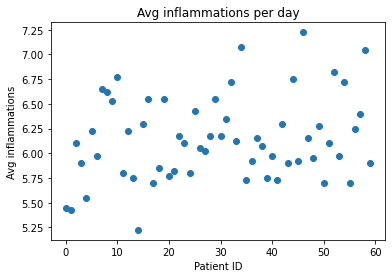

In [101]:
plt.plot(inf_data.mean(axis=1), 'o')

plt.title("Avg inflammations per day")
plt.xlabel("Patient ID")
plt.ylabel("Avg inflammations")

#### Compute mean and standard deviation (i.e. spread) of the distribution

In [ ]:
patient_means = inf_data.mean(axis=1)
patient_means.mean(), patient_means.std()

Text(0, 0.5, 'Avg inflammations')

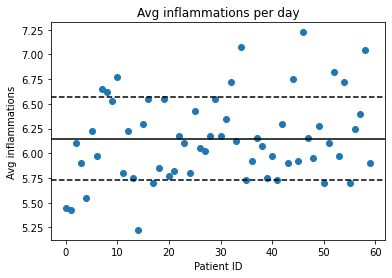

In [102]:
plt.plot(inf_data.mean(axis=1), 'o')

# plot an horizontal line
plt.axhline(patient_means.mean(), color='k')

# plot an horizontal line with a different style
plt.axhline(
    patient_means.mean() - patient_means.std(), 
    linestyle='--', 
    color='k'
)
plt.axhline(
    patient_means.mean() + patient_means.std(), 
    linestyle='--', 
    color='k'
)

plt.title("Avg inflammations per day")
plt.xlabel("Patient ID")
plt.ylabel("Avg inflammations")

#### Plot the line of a single patient

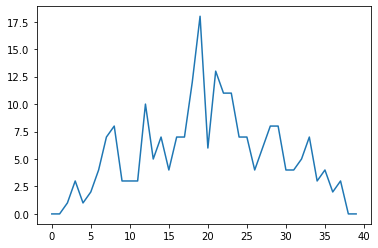

In [103]:
plt.plot(inf_data[0])

#### Plot a single line representing the daily averages

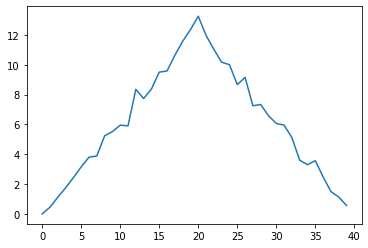

In [104]:
plt.plot(inf_data.mean(axis=0))

#### Try to plot all the lines together

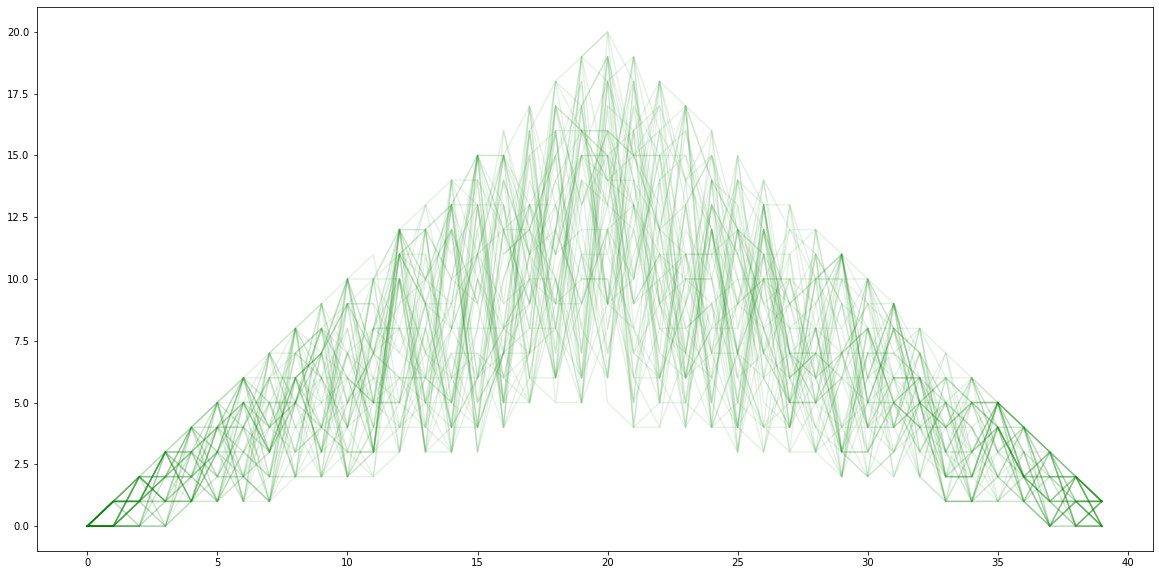

In [105]:
# create a figure of a larger size, 20x10 inches
plt.figure(figsize=(20, 10))

# data.T transposes the matrix, i.e. swap rows and columns
# the alpha parameter add some transparency
_ = plt.plot(inf_data.T, color='green', alpha=0.1)

#### Visualize the whole dataset with a heatmap

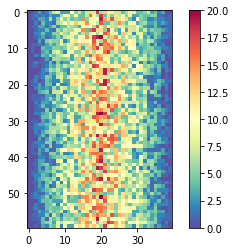

In [106]:
plt.imshow(inf_data, cmap='Spectral_r')
plt.colorbar()
plt.show()

---

## Solution 2 with Dictionary VS Numpy

```python
def overall_average(patients: Dataset) -> float:
    num_values = 0
    sum_of_values = 0
    for inflammation_data in patients.values():
        num_values += len(inflammation_data)
        sum_of_values += sum(inflammation_data)
    return sum_of_values / num_values
```

Let's recall what the implementation was like

Let's Now try to load `inflammation-02.csv` file in Numpy

In [107]:
DATA_FOLDER

PosixPath('/Users/valerio/Research/UoB/lectures/fbk-academy/2021/python-data-science/data')

In [ ]:
np.loadtxt?

In [111]:
inf_data_02 = np.loadtxt(DATA_FOLDER / "inflammation-02.csv", delimiter=",", dtype=str)

In [112]:
inf_data_02.dtype

dtype('<U4')

In [114]:
inf_data_02[:2, :10]

array([['669f', '0', '0', '1', '3', '1', '2', '4', '7', '8'],
       ['2edf', '0', '1', '2', '1', '2', '1', '3', '2', '2']], dtype='<U4')

In [116]:
from typing import Dict
DatasetNumpy = Dict[str, np.ndarray]

In [ ]:
def load_dataset_inflammation02(datapath: Path) -> DatasetNumpy:
    dataset = {}
    
    # np.asarray(LIST)
    
    return dataset

Looking for a better solution: introducing `pandas`

In [117]:
import pandas as pd

In [118]:
inf_data_pandas = pd.read_csv(DATA_FOLDER / "inflammation-02.csv", sep=",", header=None, index_col=None)

In [119]:
type(inf_data_pandas)

pandas.core.frame.DataFrame

In [120]:
inf_dataframe = inf_data_pandas

Let's have a quick look at the structure: `print`?

In [ ]:
print(inf_dataframe)

In [123]:
inf_dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,669f,0,0,1,3,1,2,4,7,8,...,4,4,5,7,3,4,2,3,0,0
1,2edf,0,1,2,1,2,1,3,2,2,...,3,5,4,4,5,5,1,1,0,1
2,0355,0,1,1,3,3,2,6,2,5,...,10,5,4,2,2,3,2,2,1,1
3,5968,0,0,2,0,4,2,2,1,6,...,3,5,6,3,3,4,2,3,2,1
4,c760,0,1,1,3,3,1,3,5,2,...,9,6,3,2,2,4,2,0,1,1


In [ ]:
pd.read_csv?

Let's see the `shape` of the data

In [125]:
inf_dataframe.shape

(60, 41)

**Now** the question is: how different this new `pandas.DataFrame` is different from a `np.ndarray`?

Slicing & `pd.Series`

So let's try:

```python
inf_dataframe[3]
```

and then: 

```python
inf_dataframe[3:5]
```

and finally:

```python
inf_dataframe[2:6, 3:5]
```

First, what would it be the output if they were `np.ndarray`?

In [126]:
inf_dataframe[3]

0     1
1     2
2     1
3     2
4     1
5     1
6     2
7     1
8     0
9     1
10    0
11    0
12    2
13    0
14    2
15    1
16    0
17    0
18    2
19    2
20    1
21    2
22    0
23    1
24    1
25    2
26    1
27    1
28    2
29    0
30    1
31    2
32    2
33    2
34    1
35    0
36    2
37    1
38    0
39    1
40    0
41    1
42    1
43    1
44    1
45    2
46    2
47    1
48    1
49    1
50    2
51    2
52    0
53    2
54    2
55    1
56    1
57    1
58    0
59    1
Name: 3, dtype: int64

In [127]:
type(inf_dataframe[3])

pandas.core.series.Series

In [128]:
inf_dataframe[3:5]

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
3,5968,0,0,2,0,4,2,2,1,6,...,3,5,6,3,3,4,2,3,2,1
4,c760,0,1,1,3,3,1,3,5,2,...,9,6,3,2,2,4,2,0,1,1


In [130]:
type(inf_dataframe[3:5])

pandas.core.frame.DataFrame

In [132]:
inf_dataframe[2:6,3:5]

TypeError: '(slice(2, 6, None), slice(3, 5, None))' is an invalid key

Adding information on Columns

In [133]:
inf_dataframe.loc[3:5]

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
3,5968,0,0,2,0,4,2,2,1,6,...,3,5,6,3,3,4,2,3,2,1
4,c760,0,1,1,3,3,1,3,5,2,...,9,6,3,2,2,4,2,0,1,1
5,6b51,0,0,1,2,2,4,2,1,6,...,8,4,7,3,5,4,4,3,2,1


In [134]:
inf_dataframe.index

RangeIndex(start=0, stop=60, step=1)

In [136]:
inf_dataframe.loc[2:6, 3:6]

,3,4,5,6
2,1,3,3,2
3,2,0,4,2
4,1,3,3,1
5,1,2,2,4
6,2,2,4,2


In [137]:
inf_dataframe.iloc[2:6, 3:6]

,3,4,5
2,1,3,3
3,2,0,4
4,1,3,3
5,1,2,2


Now let's take a `slice` of the original Data Frame and save it to a new `subdf` variable

In [141]:
slice_df = inf_dataframe.iloc[2:6, 3:6]
type(slice_df)

pandas.core.frame.DataFrame

In [143]:
slice_df

,3,4,5
2,1,3,3
3,2,0,4
4,1,3,3
5,1,2,2


In [144]:
slice_df.iloc[0]

3    1
4    3
5    3
Name: 2, dtype: int64

In [146]:
slice_df.loc[2]

3    1
4    3
5    3
Name: 2, dtype: int64

In [148]:
type(slice_df.loc[2])

pandas.core.series.Series

In [149]:
slice_df.loc[2].values

array([1, 3, 3])

In [150]:
slice_df.loc[2] = 42

In [151]:
slice_df.head()

,3,4,5
2,42,42,42
3,2,0,4
4,1,3,3
5,1,2,2


In [152]:
slice_df[2] = 41

In [153]:
slice_df

,3,4,5,2
2,42,42,42,41
3,2,0,4,41
4,1,3,3,41
5,1,2,2,41


In [154]:
slice_df_take2 = inf_dataframe.loc[2:6]

In [155]:
slice_df_take2.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
2,0355,0,1,1,3,3,2,6,2,5,...,10,5,4,2,2,3,2,2,1,1
3,5968,0,0,2,0,4,2,2,1,6,...,3,5,6,3,3,4,2,3,2,1
4,c760,0,1,1,3,3,1,3,5,2,...,9,6,3,2,2,4,2,0,1,1
5,6b51,0,0,1,2,2,4,2,1,6,...,8,4,7,3,5,4,4,3,2,1
6,dbaf,0,0,2,2,4,2,2,5,5,...,8,8,4,2,3,5,4,1,1,1


In [156]:
slice_df_take2.loc[2] = 42

/Users/valerio/anaconda3/envs/pyds/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [161]:
slice_df_take2[3] = 43

/var/folders/16/xdrp9d8s5510rt6fwr4j6llr0000gn/T/ipykernel_61153/2981034643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slice_df_take2[3] = 43


In [157]:
slice_df[0] = 42

In [159]:
slice_df[3] = 43

In [160]:
slice_df

,3,4,5,2,0
2,43,42,42,41,42
3,43,0,4,41,42
4,43,3,3,41,42
5,43,2,2,41,42


In [162]:
inf_dataframe[0]

0     669f
1     2edf
2       42
3     5968
4     c760
5     6b51
6     dbaf
7     b3b7
8     3995
9     d6ff
10    2d58
11    a1d4
12    71e9
13    65c1
14    1edd
15    277b
16    fe0e
17    66d3
18    3ff3
19    4102
20    12c9
21    5b04
22    1fef
23    01c0
24    57b5
25    226c
26    c653
27    94fd
28    ebf2
29    fc73
30    d4a0
31    a9f2
32    dc22
33    a6e7
34    3fb2
35    11cc
36    c9f5
37    a73f
38    dab2
39    65a1
40    8bcb
41    4004
42    c2af
43    8037
44    cb49
45    2b4b
46    80a8
47    ac50
48    57ef
49    cc45
50    9184
51    84be
52    0af0
53    bf77
54    c56c
55    7d0c
56    c736
57    c5c8
58    050a
59    a085
Name: 0, dtype: object

In [163]:
inf_dataframe.index

RangeIndex(start=0, stop=60, step=1)

In [ ]:
inf_dataframe.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40],
           dtype='int64')

**LIST COMPREHENSION**

```python

[]
```

In [166]:
columns = ["PatientID"] + [f"Day{i}" for i in range(1, 41)]

In [167]:
columns

['PatientID',
 'Day1',
 'Day2',
 'Day3',
 'Day4',
 'Day5',
 'Day6',
 'Day7',
 'Day8',
 'Day9',
 'Day10',
 'Day11',
 'Day12',
 'Day13',
 'Day14',
 'Day15',
 'Day16',
 'Day17',
 'Day18',
 'Day19',
 'Day20',
 'Day21',
 'Day22',
 'Day23',
 'Day24',
 'Day25',
 'Day26',
 'Day27',
 'Day28',
 'Day29',
 'Day30',
 'Day31',
 'Day32',
 'Day33',
 'Day34',
 'Day35',
 'Day36',
 'Day37',
 'Day38',
 'Day39',
 'Day40']

In [168]:
inf_dataframe.columns = columns

In [169]:
inf_dataframe.head()

,PatientID,Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,Day9,...,Day31,Day32,Day33,Day34,Day35,Day36,Day37,Day38,Day39,Day40
0,669f,0,0,1,3,1,2,4,7,8,...,4,4,5,7,3,4,2,3,0,0
1,2edf,0,1,2,1,2,1,3,2,2,...,3,5,4,4,5,5,1,1,0,1
2,42,42,42,43,42,42,42,42,42,42,...,42,42,42,42,42,42,42,42,42,42
3,5968,0,0,43,0,4,2,2,1,6,...,3,5,6,3,3,4,2,3,2,1
4,c760,0,1,43,3,3,1,3,5,2,...,9,6,3,2,2,4,2,0,1,1


In [172]:
inf_dataframe["PatientID"]

0     669f
1     2edf
2       42
3     5968
4     c760
5     6b51
6     dbaf
7     b3b7
8     3995
9     d6ff
10    2d58
11    a1d4
12    71e9
13    65c1
14    1edd
15    277b
16    fe0e
17    66d3
18    3ff3
19    4102
20    12c9
21    5b04
22    1fef
23    01c0
24    57b5
25    226c
26    c653
27    94fd
28    ebf2
29    fc73
30    d4a0
31    a9f2
32    dc22
33    a6e7
34    3fb2
35    11cc
36    c9f5
37    a73f
38    dab2
39    65a1
40    8bcb
41    4004
42    c2af
43    8037
44    cb49
45    2b4b
46    80a8
47    ac50
48    57ef
49    cc45
50    9184
51    84be
52    0af0
53    bf77
54    c56c
55    7d0c
56    c736
57    c5c8
58    050a
59    a085
Name: PatientID, dtype: object

In [173]:
inf_dataframe.set_index("PatientID", inplace=True)

In [174]:
inf_dataframe.head()

,Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,Day9,Day10,...,Day31,Day32,Day33,Day34,Day35,Day36,Day37,Day38,Day39,Day40
PatientID,,,,,,,,,,,,,,,,,,,,,
669f,0,0,1,3,1,2,4,7,8,3,...,4,4,5,7,3,4,2,3,0,0
2edf,0,1,2,1,2,1,3,2,2,6,...,3,5,4,4,5,5,1,1,0,1
42,42,42,43,42,42,42,42,42,42,42,...,42,42,42,42,42,42,42,42,42,42
5968,0,0,43,0,4,2,2,1,6,7,...,3,5,6,3,3,4,2,3,2,1
c760,0,1,43,3,3,1,3,5,2,4,...,9,6,3,2,2,4,2,0,1,1


In [175]:
inf_dataframe.loc["669f"]

Day1      0
Day2      0
Day3      1
Day4      3
Day5      1
Day6      2
Day7      4
Day8      7
Day9      8
Day10     3
Day11     3
Day12     3
Day13    10
Day14     5
Day15     7
Day16     4
Day17     7
Day18     7
Day19    12
Day20    18
Day21     6
Day22    13
Day23    11
Day24    11
Day25     7
Day26     7
Day27     4
Day28     6
Day29     8
Day30     8
Day31     4
Day32     4
Day33     5
Day34     7
Day35     3
Day36     4
Day37     2
Day38     3
Day39     0
Day40     0
Name: 669f, dtype: int64

In [176]:
inf_dataframe.iloc[0:3]

,Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,Day9,Day10,...,Day31,Day32,Day33,Day34,Day35,Day36,Day37,Day38,Day39,Day40
PatientID,,,,,,,,,,,,,,,,,,,,,
669f,0,0,1,3,1,2,4,7,8,3,...,4,4,5,7,3,4,2,3,0,0
2edf,0,1,2,1,2,1,3,2,2,6,...,3,5,4,4,5,5,1,1,0,1
42,42,42,43,42,42,42,42,42,42,42,...,42,42,42,42,42,42,42,42,42,42


In [178]:
inf_dataframe.iloc[0:3][("Day7", "Day8", "Day9")]

KeyError: ('Day7', 'Day8', 'Day9')

In [179]:
inf_dataframe.iloc[0:3][["Day7", "Day8", "Day9"]]

,Day7,Day8,Day9
PatientID,,,
669f,4,7,8
2edf,3,2,2
42,42,42,42


In [180]:
inf_dataframe.head()

,Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,Day9,Day10,...,Day31,Day32,Day33,Day34,Day35,Day36,Day37,Day38,Day39,Day40
PatientID,,,,,,,,,,,,,,,,,,,,,
669f,0,0,1,3,1,2,4,7,8,3,...,4,4,5,7,3,4,2,3,0,0
2edf,0,1,2,1,2,1,3,2,2,6,...,3,5,4,4,5,5,1,1,0,1
42,42,42,43,42,42,42,42,42,42,42,...,42,42,42,42,42,42,42,42,42,42
5968,0,0,43,0,4,2,2,1,6,7,...,3,5,6,3,3,4,2,3,2,1
c760,0,1,43,3,3,1,3,5,2,4,...,9,6,3,2,2,4,2,0,1,1


In [181]:
inf_dataframe.values

array([[ 0,  0,  1, ...,  3,  0,  0],
       [ 0,  1,  2, ...,  1,  0,  1],
       [42, 42, 43, ..., 42, 42, 42],
       ...,
       [ 0,  1,  1, ...,  1,  1,  1],
       [ 0,  0,  0, ...,  0,  2,  0],
       [ 0,  0,  1, ...,  1,  1,  0]])

In [183]:
inflammation_data = inf_dataframe.values

In [184]:
type(inflammation_data)

numpy.ndarray

In [185]:
inflammation_data.shape

(60, 40)

Calculate Statistics with Pandas

In [186]:
inf_dataframe.describe()

,Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,Day9,Day10,...,Day31,Day32,Day33,Day34,Day35,Day36,Day37,Day38,Day39,Day40
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.700000,1.133333,4.583333,2.400000,3.083333,3.816667,4.400000,4.550000,5.85000,6.066667,...,6.600000,6.566667,5.750000,4.266667,3.966667,4.216667,3.150000,2.166667,1.816667,1.250000
std,5.422177,5.388206,11.702950,5.304939,5.234474,5.199386,5.221208,5.289661,5.12827,5.220126,...,5.269677,5.113514,5.030837,5.265386,5.297798,5.152231,5.223237,5.358872,5.337719,5.372955
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.00000,2.000000,...,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.750000,4.00000,3.750000,...,4.000000,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,2.000000,2.000000,3.000000,4.000000,4.000000,5.00000,6.000000,...,6.000000,6.000000,5.000000,4.000000,3.000000,4.000000,2.000000,1.000000,1.000000,1.000000
75%,0.000000,1.000000,2.000000,3.000000,3.250000,4.000000,5.000000,6.000000,7.00000,7.000000,...,8.000000,8.000000,6.000000,5.000000,5.000000,5.000000,4.000000,3.000000,2.000000,1.000000
max,42.000000,42.000000,43.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.00000,42.000000,...,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000


In [187]:
inf_dataframe.mean()

Day1      0.700000
Day2      1.133333
Day3      4.583333
Day4      2.400000
Day5      3.083333
Day6      3.816667
Day7      4.400000
Day8      4.550000
Day9      5.850000
Day10     6.066667
Day11     6.566667
Day12     6.483333
Day13     8.983333
Day14     8.350000
Day15     9.000000
Day16     9.950000
Day17    10.200000
Day18    11.150000
Day19    12.116667
Day20    12.883333
Day21    13.633333
Day22    12.433333
Day23    11.533333
Day24    10.583333
Day25    10.583333
Day26     9.166667
Day27     9.666667
Day28     7.833333
Day29     7.966667
Day30     7.250000
Day31     6.600000
Day32     6.566667
Day33     5.750000
Day34     4.266667
Day35     3.966667
Day36     4.216667
Day37     3.150000
Day38     2.166667
Day39     1.816667
Day40     1.250000
dtype: float64

In [188]:
inf_dataframe.mean(axis=1)

PatientID
669f     5.450
2edf     5.425
42      42.025
5968     6.925
c760     6.600
6b51     7.275
dbaf     7.000
b3b7     6.650
3995     6.625
d6ff     6.525
2d58     6.775
a1d4     5.800
71e9     6.225
65c1     5.750
1edd     5.225
277b     6.300
fe0e     6.550
66d3     5.700
3ff3     5.850
4102     6.550
12c9     5.775
5b04     5.825
1fef     6.175
01c0     6.100
57b5     5.800
226c     6.425
c653     6.050
94fd     6.025
ebf2     6.175
fc73     6.550
d4a0     6.175
a9f2     6.350
dc22     6.725
a6e7     6.125
3fb2     7.075
11cc     5.725
c9f5     5.925
a73f     6.150
dab2     6.075
65a1     5.750
8bcb     5.975
4004     5.725
c2af     6.300
8037     5.900
cb49     6.750
2b4b     5.925
80a8     7.225
ac50     6.150
57ef     5.950
cc45     6.275
9184     5.700
84be     6.100
0af0     6.825
bf77     5.975
c56c     6.725
7d0c     5.700
c736     6.250
c5c8     6.400
050a     7.050
a085     5.900
dtype: float64

In [190]:
inf_dataframe.mean(axis=0)

Day1      0.700000
Day2      1.133333
Day3      4.583333
Day4      2.400000
Day5      3.083333
Day6      3.816667
Day7      4.400000
Day8      4.550000
Day9      5.850000
Day10     6.066667
Day11     6.566667
Day12     6.483333
Day13     8.983333
Day14     8.350000
Day15     9.000000
Day16     9.950000
Day17    10.200000
Day18    11.150000
Day19    12.116667
Day20    12.883333
Day21    13.633333
Day22    12.433333
Day23    11.533333
Day24    10.583333
Day25    10.583333
Day26     9.166667
Day27     9.666667
Day28     7.833333
Day29     7.966667
Day30     7.250000
Day31     6.600000
Day32     6.566667
Day33     5.750000
Day34     4.266667
Day35     3.966667
Day36     4.216667
Day37     3.150000
Day38     2.166667
Day39     1.816667
Day40     1.250000
dtype: float64

In [189]:
inf_dataframe.mean?

Signature:
inf_dataframe.mean(
    axis=None,
    skipna=None,
    level=None,
    numeric_only=None,
    **kwargs,
)
Docstring:
Return the mean of the values over the requested axis.

Parameters
----------
axis : {index (0), columns (1)}
    Axis for the function to be applied on.
skipna : bool, default True
    Exclude NA/null values when computing the result.
level : int or level name, default None
    If the axis is a MultiIndex (hierarchical), count along a
    particular level, collapsing into a Series.
numeric_only : bool, default None
    Include only float, int, boolean columns. If None, will attempt to use
    everything, then use only numeric data. Not implemented for Series.
**kwargs
    Additional keyword arguments to be passed to the function.

Returns
-------
Series or DataFrame (if level specified)
File:      ~/anaconda3/envs/pyds/lib/python3.9/site-packages/pandas/core/generic.py
Type:      method


In [191]:
inf_dataframe.values.mean()

6.816666666666666

Plot with Pandas

<AxesSubplot:xlabel='PatientID'>

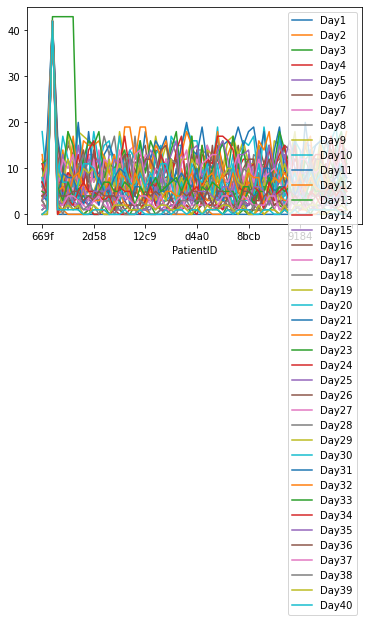

In [192]:
inf_dataframe.plot()

<AxesSubplot:xlabel='PatientID'>

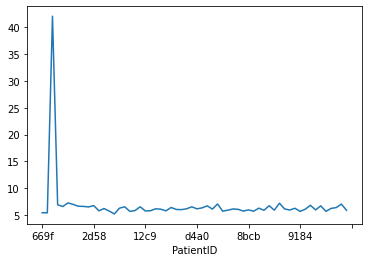

In [193]:
inf_dataframe.mean(axis=1).plot()

<AxesSubplot:>

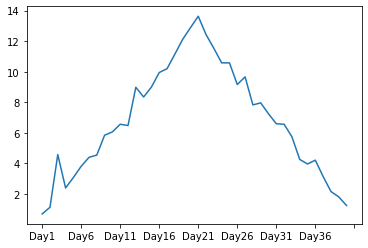

In [194]:
inf_dataframe.mean(axis=0).plot()

<AxesSubplot:>

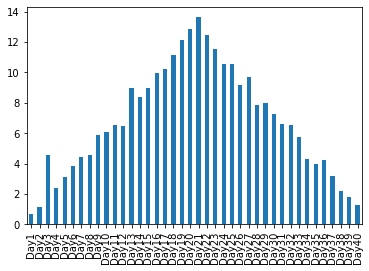

In [195]:
inf_dataframe.mean(axis=0).plot(kind='bar')

In [196]:
inf_dataframe.plot?

Signature:      inf_dataframe.plot(*args, **kwargs)
Type:           PlotAccessor
String form:    <pandas.plotting._core.PlotAccessor object at 0x11b2f1b80>
File:           ~/anaconda3/envs/pyds/lib/python3.9/site-packages/pandas/plotting/_core.py
Docstring:     
Make plots of Series or DataFrame.

Uses the backend specified by the
option ``plotting.backend``. By default, matplotlib is used.

Parameters
----------
data : Series or DataFrame
    The object for which the method is called.
x : label or position, default None
    Only used if data is a DataFrame.
y : label, position or list of label, positions, default None
    Allows plotting of one column versus another. Only used if data is a
    DataFrame.
kind : str
    The kind of plot to produce:

    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' :

In [198]:
inf_dataframe.min(axis=1) == 0

PatientID
669f     True
2edf     True
42      False
5968     True
c760     True
6b51     True
dbaf     True
b3b7     True
3995     True
d6ff     True
2d58     True
a1d4     True
71e9     True
65c1     True
1edd     True
277b     True
fe0e     True
66d3     True
3ff3     True
4102     True
12c9     True
5b04     True
1fef     True
01c0     True
57b5     True
226c     True
c653     True
94fd     True
ebf2     True
fc73     True
d4a0     True
a9f2     True
dc22     True
a6e7     True
3fb2     True
11cc     True
c9f5     True
a73f     True
dab2     True
65a1     True
8bcb     True
4004     True
c2af     True
8037     True
cb49     True
2b4b     True
80a8     True
ac50     True
57ef     True
cc45     True
9184     True
84be     True
0af0     True
bf77     True
c56c     True
7d0c     True
c736     True
c5c8     True
050a     True
a085     True
dtype: bool

In [203]:
inf_dataframe[inf_dataframe["Day1"] > 0].iloc[:, :10]

,Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,Day9,Day10
PatientID,,,,,,,,,,
42,42,42,43,42,42,42,42,42,42,42


In [204]:
inf_dataframe[inf_dataframe["Day1"] > 0].iloc[:10]

,Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,Day9,Day10,...,Day31,Day32,Day33,Day34,Day35,Day36,Day37,Day38,Day39,Day40
PatientID,,,,,,,,,,,,,,,,,,,,,
42,42,42,43,42,42,42,42,42,42,42,...,42,42,42,42,42,42,42,42,42,42


In [212]:
inf_dataframe[(inf_dataframe["Day1"] == 0) & (inf_dataframe["Day3"] > 42)]

,Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,Day9,Day10,...,Day31,Day32,Day33,Day34,Day35,Day36,Day37,Day38,Day39,Day40
PatientID,,,,,,,,,,,,,,,,,,,,,
5968,0,0,43,0,4,2,2,1,6,7,...,3,5,6,3,3,4,2,3,2,1
c760,0,1,43,3,3,1,3,5,2,4,...,9,6,3,2,2,4,2,0,1,1
6b51,0,0,43,2,2,4,2,1,6,4,...,8,4,7,3,5,4,4,3,2,1
dbaf,0,0,43,2,4,2,2,5,5,8,...,8,8,4,2,3,5,4,1,1,1


In [207]:
inf_dataframe["Day7"]

PatientID
669f     4
2edf     3
42      42
5968     2
c760     3
6b51     2
dbaf     2
b3b7     2
3995     6
d6ff     5
2d58     3
a1d4     2
71e9     6
65c1     1
1edd     4
277b     4
fe0e     6
66d3     4
3ff3     4
4102     3
12c9     4
5b04     2
1fef     1
01c0     3
57b5     5
226c     2
c653     2
94fd     1
ebf2     6
fc73     6
d4a0     4
a9f2     5
dc22     6
a6e7     6
3fb2     5
11cc     6
c9f5     5
a73f     5
dab2     1
65a1     5
8bcb     3
4004     2
c2af     2
8037     3
cb49     4
2b4b     1
80a8     4
ac50     6
57ef     1
cc45     5
9184     5
84be     2
0af0     5
bf77     4
c56c     5
7d0c     6
c736     1
c5c8     6
050a     6
a085     5
Name: Day7, dtype: int64

**GREAT TIME FOR A BREAK NOW!** ☕️🧁🍪